In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 50)
from scipy.spatial import cKDTree
from math import *
np.random.seed(123)
import urllib.request
import urllib, os

In [2]:
import pandas as pd
import xarray as xr
import math
from datetime import date, timedelta
from dateutil.relativedelta import relativedelta

In [3]:
import numpy as np
import xarray as xr
import xesmf as xe

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [16]:
ds = xr.open_dataset(r'/home/shubham/ugp/cleaned/Precipitation_1979-2022(ver2).nc')

In [17]:
ds

<xarray.Dataset>
Dimensions:        (time: 517, y: 72, x: 144)
Coordinates:
    lon            (x) float32 ...
    lat            (y) float32 ...
  * time           (time) datetime64[ns] 1979-02-01 1979-03-01 ... 2022-02-01
Dimensions without coordinates: y, x
Data variables:
    precipitation  (time, y, x) float32 ...
Attributes:
    description:  Precipitation(in mm/day) data NOAA NCEP CPC Merged_Analysis...

In [8]:
ds= ds['precipitation'][278:-3][:][:]
ds 

<xarray.DataArray 'precipitation' (time: 236, y: 72, x: 144)>
[2446848 values with dtype=float32]
Coordinates:
    lon      (x) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
    lat      (y) float32 -88.75 -86.25 -83.75 -81.25 ... 81.25 83.75 86.25 88.75
  * time     (time) datetime64[ns] 2002-04-01 2002-05-01 ... 2021-11-01
Dimensions without coordinates: y, x

In [9]:
per = pd.DatetimeIndex(ds.time).to_period("M")
per

PeriodIndex(['2002-04', '2002-05', '2002-06', '2002-07', '2002-08', '2002-09',
             '2002-10', '2002-11', '2002-12', '2003-01',
             ...
             '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07',
             '2021-08', '2021-09', '2021-10', '2021-11'],
            dtype='period[M]', length=236)

In [10]:
(per)

PeriodIndex(['2002-04', '2002-05', '2002-06', '2002-07', '2002-08', '2002-09',
             '2002-10', '2002-11', '2002-12', '2003-01',
             ...
             '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07',
             '2021-08', '2021-09', '2021-10', '2021-11'],
            dtype='period[M]', length=236)

In [11]:
l = []
for i in range(13):
    l.append(ds[per.month == i])
    

In [12]:
l[1]

<xarray.DataArray 'precipitation' (time: 19, y: 72, x: 144)>
[196992 values with dtype=float32]
Coordinates:
    lon      (x) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
    lat      (y) float32 -88.75 -86.25 -83.75 -81.25 ... 81.25 83.75 86.25 88.75
  * time     (time) datetime64[ns] 2003-01-01 2004-01-01 ... 2021-01-01
Dimensions without coordinates: y, x

In [13]:
f = []
for i in range(1, 13):
    k = []
    for j in range(1, len(l[i])):
        k.append(l[i][j][:][:].mean())
    f.append(k)

In [14]:
for i in range(0, len(f)):
    print(np.array(f[i]))

[2.128995  2.154458  2.0447607 2.1776314 2.088049  2.07348   2.0336537
 2.0473456 2.2707715 2.3022933 2.250842  2.0951724 2.0767486 2.269407
 2.2446074 2.2441301 2.0073814 2.0341647]
[2.0662289 2.160029  2.1593199 2.1124902 2.102264  2.0608788 2.0744607
 2.2991414 2.2020612 2.2402024 2.2787402 2.2875319 2.2978857 2.28361
 2.2353086 2.1820004 2.21525   2.044043 ]
[2.1281056 2.0949538 2.1185803 2.0627353 2.0617468 2.0679235 2.0616465
 2.285978  2.2154224 2.1995428 2.2792902 2.2462826 2.2962093 2.3174634
 2.2492104 2.2316494 2.2906175 2.0172095]
[2.108668  2.2192576 2.1151736 2.0719597 2.0890741 2.0240307 2.0888515
 2.0674083 2.230755  2.3218083 2.2064486 2.2558284 2.2637808 2.2497156
 2.3505747 2.289784  2.2459586 2.1939244 2.026772 ]
[2.142777  2.0663977 2.1184337 2.0852046 2.0471904 2.045225  2.1871827
 2.0534616 2.204869  2.1633527 2.1955035 2.2259731 2.2275162 2.2208593
 2.2785466 2.1735165 2.2381172 2.1200964 1.9997029]
[2.176339  2.1181626 2.1659434 2.1238716 2.099077  2.024603  2.

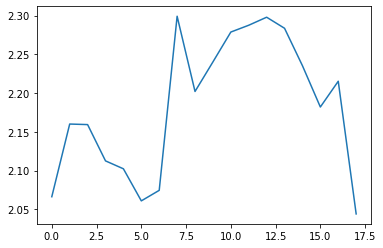

In [15]:
A = np.array(f[1])
a = np.interp(np.arange(len(A)), 
          np.arange(len(A))[np.isnan(A) == False], 
          A[np.isnan(A) == False])
plt.plot(a)

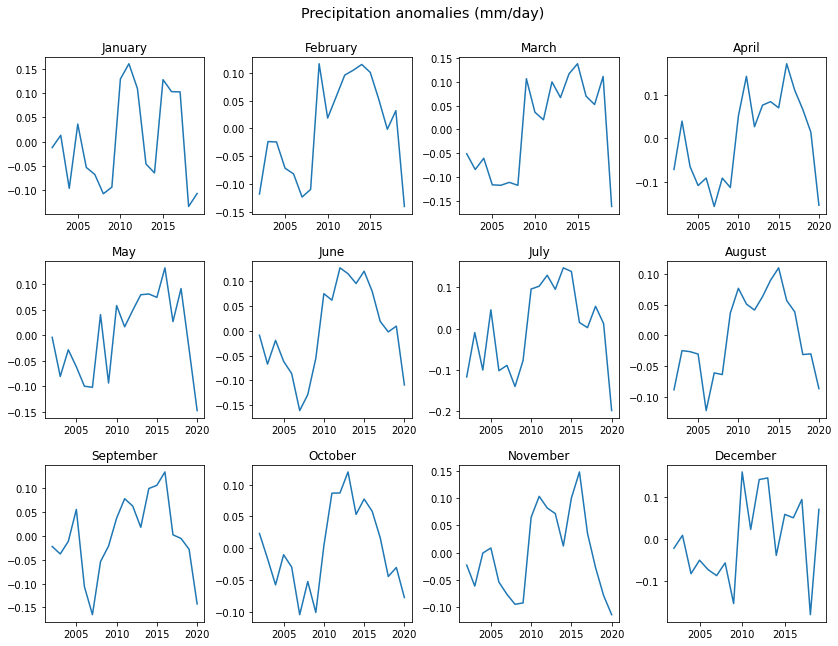

<Figure size 432x288 with 0 Axes>

In [19]:
import datetime
fig = plt.figure(figsize = (14, 10))
fig.suptitle("Precipitation anomalies (mm/day)", fontsize = 'x-large')
for i in range(1, 13):
    plt.subplot(3, 4, i)
    plt.title(datetime.date(1900, i , 1).strftime('%B'))
    A = np.array(f[i - 1])
    a = np.interp(np.arange(len(A)), 
          np.arange(len(A))[np.isnan(A) == False], 
          A[np.isnan(A) == False])
    mea = a.mean()
    plt.plot(np.array(range(2002, 2002 + len(a))), a-mea)
plt.subplots_adjust(hspace=0.3, wspace=0.3)
fig.subplots_adjust(top=0.91)
plt.show()
plt.savefig('ppt.png')